In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [47]:
track_data = pd.read_csv("tracks_features.csv")


In [48]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [49]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [50]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [51]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [52]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
958135,Recall: I. Cantico antico,Accordion Concertos,"['Per Nørgård', 'Bjarke Mogensen', 'Danish Nat...",0.198,0.0405,0.97300,0.006720,0.2870,0.0384,0.0146,85.754,285360,2012
398488,Don't Destroy the Funk,Real Life .:.High Fidelity,['Phat Phunktion'],0.711,0.0769,0.07280,0.809000,0.0093,0.9320,0.7520,100.045,306640,2011
725401,Kokomo,Best Of,['Saragossa Band'],0.772,0.0316,0.04380,0.000610,0.4270,0.5700,0.8630,121.870,234040,2008
736353,"Cello Suite No. 5 in C Minor, BWV 1011: VI. Ga...",Bach: Cello Suites Nos. 4-6,"['Johann Sebastian Bach', 'Paolo Beschi']",0.387,0.0752,0.88400,0.875000,0.1060,0.5080,0.0508,72.573,143867,2014
798946,Horsehead,Deceiver,['DIIV'],0.327,0.0328,0.00205,0.725000,0.0914,0.2240,0.5600,166.025,308453,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509018,Ghost,"Danish Electro, Vol. 1",['Disrupted Being'],0.618,0.0283,0.10600,0.071400,0.1250,0.2980,0.6750,139.950,327429,2018
362824,Day and Night: No. 1. A Kill,Nørgård: Songs from Evening Land,"['Per Nørgård', 'Helene Gjerris', 'Toke Møldru...",0.569,0.0737,0.81000,0.000013,0.3960,0.3320,0.2360,137.455,120027,2013
914051,Кто такой?,12 Стульев,['KlouKoma'],0.905,0.1360,0.01890,0.315000,0.1070,0.3710,0.7180,144.992,123414,2019
697962,Focus,The Time Is Now (Expanded Edition),['Craig David'],0.635,0.0309,0.02960,0.000008,0.2320,0.7080,0.9280,123.980,176653,2018


In [53]:
sampled_data["Duration(ms)"].max()

5298125

In [54]:
sampled_data["Duration(ms)"].min()

3000

In [55]:
sampled_data["Duration(ms)"].mean()

247942.15290697676

In [10]:
duration_bins = [0, 100000, 200000, 300000, 400000, 500000, 5000000]
duration_groupings = ["Duration <=100000", "Duration 100000-200000", "Duration 200000-300000",
                      "Duration 300000-400000", "Duration 400000-500000", "Duration 500000-5000000"]
sampled_data["Duration(ms)"] = pd.cut(sampled_data["Duration(ms)"], duration_bins, labels=duration_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
442900,Hurts Don't It,Somebody's Gonna Pay,['Mickie James'],0.493,0.0267,0.376000,0.00000,0.1020,0.4480,0.6430,76.872,Duration 200000-300000,2013
209584,The Gal From Joe's,Dick Hyman Plays Duke Ellington,['Dick Hyman'],0.374,0.0406,0.988000,0.90800,0.1020,0.3190,0.0772,174.707,Duration 200000-300000,2012
490946,Lovely Life,New Prehistoric Times,['The Northstar Session'],0.539,0.0281,0.000074,0.00141,0.1190,0.6980,0.7580,132.005,Duration 200000-300000,2008
59338,ToHoldYou!!!,Zion II,['9th Wonder'],0.453,0.0800,0.351000,0.18700,0.3010,0.8400,0.5240,85.531,Duration 100000-200000,2017
641913,"Symphony in E-Flat Major, A29: III. Menuetto m...",Rosetti: Piano Concerto & 2 Symphonies,"['Antonio Rosetti', 'Südwestdeutsches Kammeror...",0.420,0.0410,0.993000,0.78600,0.1170,0.1970,0.0198,133.601,Duration 100000-200000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949739,Love Letters In the Sand,25 Greatest Bluegrass Hits,['Mac Wiseman'],0.520,0.0472,0.596000,0.00000,0.2290,0.7010,0.5630,187.340,Duration 100000-200000,2008
296021,Reminders (Extended Version),Reminders (single),['Stromkern'],0.608,0.0492,0.002170,0.00214,0.2210,0.4640,0.7870,119.993,Duration 300000-400000,2006
669641,"Some Other Day, Some Other Time - Live",Live at the Greek Theatre,['Joe Bonamassa'],0.645,0.0365,0.080900,0.00174,0.7810,0.8160,0.8200,121.856,Duration 200000-300000,2016
921028,Viginti Tres,"10,000 Days",['TOOL'],0.119,0.2050,0.841000,0.83700,0.0732,0.0276,0.3700,77.217,Duration 300000-400000,2006


In [11]:
#getting count of each category and converting to percentage for pie chart
duration_lessthan100000 = ((sampled_data.loc[sampled_data["Duration(ms)"]=='Duration <=100000'].count())/12040)*100
duration_lessthan100000

Song Title          6.918605
Album Title         6.918605
Artists             6.918605
Danceability        6.918605
Speechiness         6.918605
Acousticness        6.918605
Instrumentalness    6.918605
Liveness            6.918605
Valence             6.918605
Energy              6.918605
Tempo               6.918605
Duration(ms)        6.918605
Release Year        6.918605
dtype: float64

In [12]:
#getting count of each category and converting to percentage for pie chart
duration100000to200000 = ((sampled_data.loc[sampled_data["Duration(ms)"]=='Duration 100000-200000'].count())/12040)*100
duration100000to200000

Song Title          31.004983
Album Title         31.004983
Artists             31.004983
Danceability        31.004983
Speechiness         31.004983
Acousticness        31.004983
Instrumentalness    31.004983
Liveness            31.004983
Valence             31.004983
Energy              31.004983
Tempo               31.004983
Duration(ms)        31.004983
Release Year        31.004983
dtype: float64

In [13]:
duration200000to300000 = ((sampled_data.loc[sampled_data["Duration(ms)"]=='Duration 200000-300000'].count())/12040)*100
duration200000to300000

Song Title          40.282392
Album Title         40.282392
Artists             40.282392
Danceability        40.282392
Speechiness         40.282392
Acousticness        40.282392
Instrumentalness    40.282392
Liveness            40.282392
Valence             40.282392
Energy              40.282392
Tempo               40.282392
Duration(ms)        40.282392
Release Year        40.282392
dtype: float64

In [42]:
duration200000to300000.mean()

40.28239202657807

In [14]:
duration300000to400000 = ((sampled_data.loc[sampled_data["Duration(ms)"]=='Duration 300000-400000'].count())/12040)*100
duration300000to400000

Song Title          12.707641
Album Title         12.707641
Artists             12.707641
Danceability        12.707641
Speechiness         12.707641
Acousticness        12.707641
Instrumentalness    12.707641
Liveness            12.707641
Valence             12.707641
Energy              12.707641
Tempo               12.707641
Duration(ms)        12.707641
Release Year        12.707641
dtype: float64

In [15]:
duration400000to500000 = ((sampled_data.loc[sampled_data["Duration(ms)"]=='Duration 400000-500000'].count())/12040)*100
duration400000to500000

Song Title          4.67608
Album Title         4.67608
Artists             4.67608
Danceability        4.67608
Speechiness         4.67608
Acousticness        4.67608
Instrumentalness    4.67608
Liveness            4.67608
Valence             4.67608
Energy              4.67608
Tempo               4.67608
Duration(ms)        4.67608
Release Year        4.67608
dtype: float64

In [16]:
duration500000to5000000 = ((sampled_data.loc[sampled_data["Duration(ms)"]=='Duration 500000-5000000'].count())/12040)*100
duration500000to5000000

Song Title          4.410299
Album Title         4.410299
Artists             4.410299
Danceability        4.410299
Speechiness         4.410299
Acousticness        4.410299
Instrumentalness    4.410299
Liveness            4.410299
Valence             4.410299
Energy              4.410299
Tempo               4.410299
Duration(ms)        4.410299
Release Year        4.410299
dtype: float64

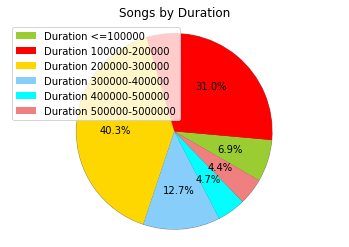

In [41]:
#pie chart
labels = ["Duration <=100000", "Duration 100000-200000", "Duration 200000-300000", "Duration 300000-400000", 
"Duration 400000-500000", "Duration 500000-5000000"]
sizes = [6.918605,  31.004983, 40.282392, 12.707641, 4.67608, 4.410299]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, shadow=True)
patches, texts, auto = ax1.pie(sizes, colors=colors, startangle=330, radius=100, shadow=True, autopct='%1.1f%%' )
plt.title("Songs by Duration")
plt.legend(patches, labels, loc="upper left")
ax1.axis('equal')
plt.savefig("Images/duration-pie.png")
plt.show()